In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Do the following in the iris dataset. 1. Read the dataset to the python environment.

In [4]:
data = pd.read_excel("Downloads/iris.xls")

In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# 2. Do necessary pre-processing steps.


In [9]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [10]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

nullvalues are filles after adding median

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


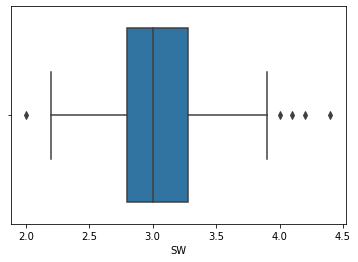

In [11]:
sns.boxplot(data["SW"])


plt.show() 

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SL'>

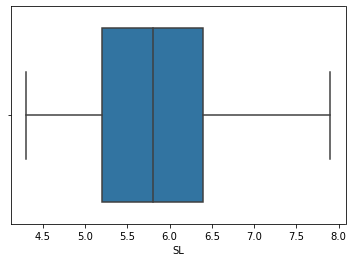

In [12]:
sns.boxplot(data["SL"])


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PL'>

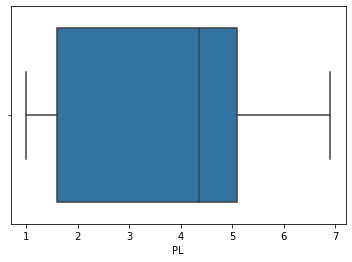

In [13]:
sns.boxplot(data["PL"])

only outliers present in SW

In [14]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')




In [15]:
IQR = Q3-Q1
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR

In [16]:
index=data['SW'][(data['SW']<low_limit)|(data['SW']>high_limit)].index
data.drop(index,inplace=True)

<AxesSubplot:xlabel='SW'>

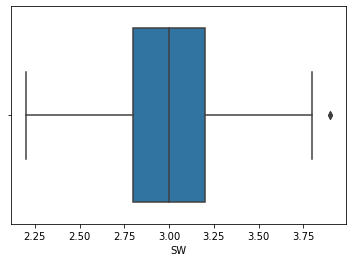

In [17]:
sns.boxplot(x=data['SW'])

In [35]:
x=data.drop('Classification',axis=1)
y=data['Classification']

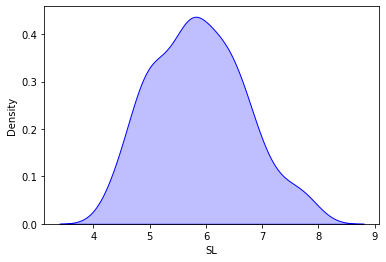

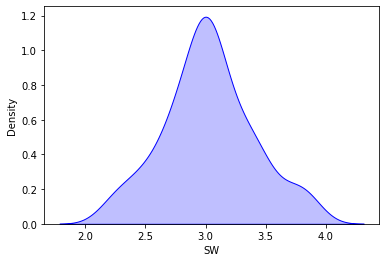

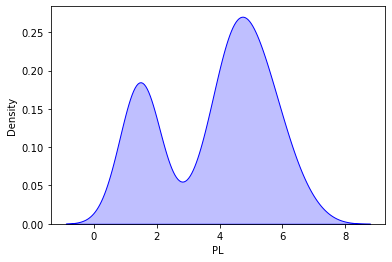

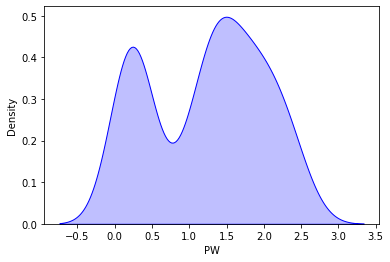

In [36]:
## checking skewness
freqgraph=data.select_dtypes(include=['float'])
## freqgraph.hist(figsize=(10,10))
for i in freqgraph:
    sns.kdeplot(data[i], color='b', shade=True,)
    plt.show()

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [37]:
#Spliting of the data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:

y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [40]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.8918918918918919
precision is : 0.8834498834498835
recall is : 0.8915343915343915
F1 score is : 0.8839506172839506


In [42]:
temp=[]
temp.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5)])

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [44]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [45]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [46]:
temp.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5)])

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

Text(0, 0.5, 'accuracy')

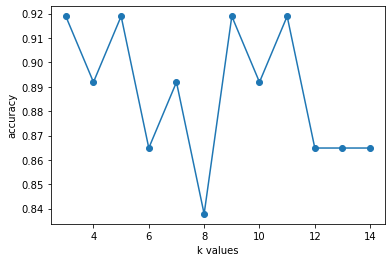

In [48]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('k values')
plt.ylabel("accuracy")

In [49]:
# k=9
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [50]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [51]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9095238095238095
recall is : 0.9153439153439153
F1 score is : 0.9112132182307621


In [54]:
temp.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5)])

# GRADIENT BOOST

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(x_train,y_train)
y_pred=gm.predict(x_test)
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [56]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [57]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [58]:
temp.append(['Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5)])

# SVM

In [59]:
#SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [60]:
y_pred[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [61]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [62]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [63]:
temp.append(['Linear SVM',round(f1_score(y_test,y_pred,average='macro'),5)])

# Radial Svm

In [64]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [65]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.8648648648648649
precision is : 0.861111111111111
recall is : 0.8677248677248678
F1 score is : 0.8570071903405238


In [66]:
temp.append(['Radial SVM',round(f1_score(y_test,y_pred,average='macro'),5)])

In [67]:
#onverting all f1 score to a dataframe
dff = pd.DataFrame(temp, columns = ['Algorithms', 'F1-Score'])

In [68]:
dff

,Algorithms,F1-Score
0,Logistic Regression,0.88395
1,Random Forest,0.91033
2,KNN,0.91121
3,KNN,0.91121
4,Gradient Booster,0.93915
5,Linear SVM,0.91033
6,Radial SVM,0.85701
